In [150]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re 
from collections import Counter 
import matplotlib.pyplot as plt

In [21]:
naver=pd.read_csv('네이버페이_전처리.csv')
kakao=pd.read_csv('카카오페이_전처리.csv')
samsung=pd.read_csv('삼성페이_전처리.csv')

In [22]:
#리스트빈것지우기
naver=naver[naver.token_REVIEW!="[]"]
samsung=samsung[samsung.token_REVIEW!="[]"]
kakao=kakao[kakao.token_REVIEW!="[]"]
naver.reset_index(drop=True,inplace=True)
samsung.reset_index(drop=True,inplace=True)
kakao.reset_index(drop=True,inplace=True)
#str => 리스트 타입 변환
naver.token_REVIEW=naver.token_REVIEW.apply(lambda x: eval("".join(x)))
samsung.token_REVIEW=samsung.token_REVIEW.apply(lambda x: eval("".join(x)))
kakao.token_REVIEW=kakao.token_REVIEW.apply(lambda x: eval("".join(x)))

In [ ]:
# stopwords = ['네이버','페이','삼성','카카오']
wordlst=[]

for data in [naver,samsung,kakao]:
    lists=[]
    for i in range(1,6):
        df=data[data.STAR==i]
        word_list=sum(df['token_REVIEW'].to_list(),[])
#         if word_list not in stopwords:
            c = Counter(word_list)
        lists.append(c.most_common(50))
    wordlst.append(lists)


In [ ]:
naver_word=wordlst[0] #네이버
samsung_word=wordlst[1] #삼성
kakao_word=wordlst[2] #카카오

In [116]:
app=[naver_word,samsung_word,kakao_word]
data=pd.DataFrame()
for j in range(3):
    dfs=app[j]
    for i in range(5):
        df=pd.DataFrame(dfs[i],columns=['단어','빈도'])
        df['별점']=i+1
        df['어플']=j
        data=data.append(df)


In [119]:
data.어플[data.어플==0]="네이버"
data.어플[data.어플==1]="삼성"
data.어플[data.어플==2]="카카오"

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [121]:
data.reset_index(inplace=True,drop=True)

In [136]:
data.to_csv('별점별 _ 빈도분석.csv', index = False)

## 워드클라우드

In [152]:
word_dict

[('네이버', 66),
 ('인증', 57),
 ('결제', 55),
 ('페이', 42),
 ('뜨다', 27),
 ('사용', 24),
 ('만들다', 24),
 ('번호', 23),
 ('카드', 23),
 ('로그인', 22),
 ('쓰다', 20),
 ('받다', 18),
 ('계속', 18),
 ('업데이트', 17),
 ('포인트', 16),
 ('계좌', 16),
 ('다시', 16),
 ('본인', 15),
 ('등록', 15),
 ('어플', 15),
 ('문자', 14),
 ('나오다', 14),
 ('고객', 14),
 ('확인', 14),
 ('불편하다', 13),
 ('연결', 13),
 ('시도', 13),
 ('기능', 13),
 ('위치', 13),
 ('화면', 12),
 ('송금', 12),
 ('하나', 12),
 ('센터', 11),
 ('현장', 11),
 ('해결', 11),
 ('그냥', 10),
 ('삭제', 10),
 ('전화', 10),
 ('정보', 10),
 ('문제', 10),
 ('적립', 10),
 ('반복', 9),
 ('모르다', 9),
 ('다른', 9),
 ('입력', 9),
 ('맞다', 8),
 ('깔다', 8),
 ('설치', 8),
 ('알다', 8),
 ('바코드', 8),
 ('인증서', 7),
 ('생각', 7),
 ('자꾸', 7),
 ('문의', 7),
 ('들어가다', 7),
 ('카카오', 7),
 ('설정', 6),
 ('거래', 6),
 ('뱅크', 6),
 ('바로', 6),
 ('통장', 6),
 ('틀리다', 6),
 ('처리', 6),
 ('광고', 6),
 ('끄다', 6),
 ('많다', 6),
 ('시작', 6),
 ('주문', 6),
 ('아이디', 6),
 ('검색', 6),
 ('자산', 6),
 ('제발', 6),
 ('간편', 6),
 ('금액', 6),
 ('이벤트', 6),
 ('단계', 5),
 ('알림', 5),
 ('오류', 5),
 ('연결

In [159]:
from PIL import Image

icon = Image.open('./naver-icon.png').convert("RGBA")
mask = Image.new("RGBA", icon.size, (255,255,255))
x, y = icon.size
mask.paste(icon,(0,0,x,y),icon)
mask = np.array(mask)
image_color = ImageColorGenerator(mask)
word_dict=naver_word[0]
wc = WordCloud(font_path = 'NanumGothic.ttf',
               background_color = 'white',
               width = 3000, height = 2000,random_state=111,mask=mask,
               min_font_size = 10)
cloud = wc.generate_from_frequencies(dict(word_dict))
cloud = cloud.recolor(color_func=image_color, random_state=123) 

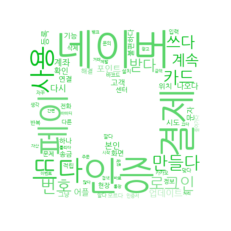

In [160]:
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()
# plt.savefig('네이버페이 별점 3,4,5 빈도수분석  ', bbox_inches = 'tight')